## Save selected point data(x,y) in a text file by pressing 'a'
- Temp.csv contains the sensor data 
- 'alist' contains list of 11 activity
- list.txt is the text file where the data(x,y) of sensor plot has been stored
- However we'll be needing only x values as it represents the time stamps value
- dropna() removes the rows that contain null values
- Using .py and running this is preferable 
- the selected data will be written in list.txt 
- total number of data shoud be even as we are going to select range between two points 
- in my device list.txt is saved in  `"/home/kishore/python/main work/list.txt"`

<IPython.core.display.Javascript object>


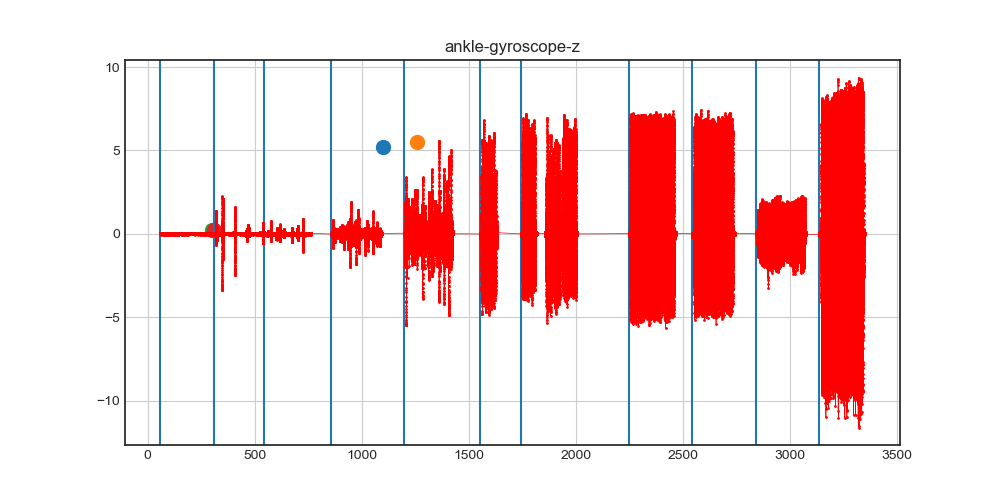

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
plt.style.use('seaborn-white')
import numpy as np
%matplotlib notebook

plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib notebook



file='/home/kishore/Datasets/PAMAP2_Dataset/cleaned/old/temp.csv'

name='ankle-gyroscope-z'

field = ['timestamp-s','activityID',name]

df = pd.read_csv(file, skipinitialspace=True, usecols=field)
df=df.dropna()
df.index=df['timestamp-s']
x=df[name]

#alist=[1,2,3,17,16,12,13,4,7,6,5]
alist=df['activityID'].unique()

startime=[]

for value in alist:
    startime.append(df.loc[df['activityID'] ==value, 'timestamp-s'].iloc[0])

activ=['1ly1','2sit2','3stand3','4iron17','5vacClean16',
       '6asStair12','7desStair13','8walk4','9run7','10cycl6',
       '11nordwalk5']

open("/home/kishore/python/main work/list.txt","w+")

def press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'a':
        plt.gcf().canvas.draw_idle()
        ix, iy = event.xdata, event.ydata
        coords = [ix, iy]
        plt.scatter(ix, iy, s=100)

        str1 = ','.join(str(v) for v in coords)       
        with open("/home/kishore/python/main work/list.txt", "a") as data:
            data.write(str1+'\n')
        data.close()
        

if __name__ == "__main__":
    fig = plt.figure()
    for value in startime:
        plt.axvline(x=value) 
        
    plt.grid()
    plt.plot(x,'ro-', marker = 'o',markersize=1.0,linewidth=0.5)

    cid = fig.canvas.mpl_connect('key_press_event', press)
    plt.title(name)
    plt.show()


## Read selected data from text file and discard 
- as we are going to read x from list.txt and then for 2 of each x value will be read as an interval
- Then we are going to drop the values row wise for each interval
- we will save the csv of its own location
- so the new file will be containing cleaned data


In [ ]:
import pandas as pd
file='/home/kishore/Datasets/PAMAP2_Dataset/cleaned/old/temp.csv'
df=pd.read_csv(file)


q=df.shape
activity_list=df['activityID'].unique()
print(activity_list)

pullData = open("/home/kishore/python/main work/list.txt","r").read()
#pullData = open("act1.txt","r").read()
dataArray = pullData.split('\n')
xar = []
#yar = []

for eachLine in dataArray:
    if len(eachLine)>1:
        x,y = eachLine.split(',')
        xar.append(float(x))
        #yar.append(float(y))

new1=['%.2f' % elem for elem in xar]
new=[float(i) for i in new1]

l=int(len(new)/2)
i=0


for j in range(0,l):
    n=i+1
    indexNames = df[ (df['timestamp-s'] >= new[i]) &
                    (df['timestamp-s'] <= new[n]) ].index
    df.drop(indexNames , inplace=True)
    print(new[i]," & ",new[n])
    print(' ')
    i=n+1
    


df.to_csv (r'/home/kishore/Datasets/PAMAP2_Dataset/cleaned/old/temp.csv', index = None, header=True)

a=pd.read_csv(file)

print("after cleaning")
activity_list=a['activityID'].unique()
print(activity_list)
qq=a.shape
print(qq)
print("data reduced =",q[0]-qq[0])

